In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import xarray as xr
import sys
import tensorflow as tf
from tensorflow import keras
import os

sys.path.insert(0, '../../src')

from utils import df_to_xarray,read_xarray, custom_rmse

sys.path.insert(0, '../../src/preprocess')
from data_preprocess import preprocess_image_reduced,preprocess_images_nfp, inverse_scale_frame
from data_preprocess import preprocess_images, inverse_scale_image, preprocess_image_reduced

/burg/glab/users/sk4973/venv2/lib/python3.8/site-packages/xarray/backends/cfgrib_.py:27: UserWarning: Failed to load cfgrib - most likely there is a problem accessing the ecCodes library. Try `import cfgrib` to get the full error message
  warnings.warn(
2022-10-27 10:59:40.704784: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0


In [2]:
dist_map = pd.read_csv("../../src/dist_map.csv",header=None).to_numpy()
dist_map = np.roll(np.fliplr(dist_map),180)
dist_map = np.repeat(dist_map[np.newaxis, :, : ], 421, axis=0)

def custom_rmse2(y_true, y_pred):
    """
    custom_rmse(y_true, y_pred)
    calculates root square mean value with focusing only on the ocean
    + difference between sss
    """
    idx  = tf.not_equal(y_true, 0.0)
    idx2  = tf.equal(y_true, 0.0)
    
    y_pred1 = tf.boolean_mask(y_pred,idx)
    y_true1 = tf.boolean_mask(y_true,idx)
    y_true1 = tf.cast(y_true1, y_pred.dtype)
    
    
    return rmse1

In [3]:
dir_name = "../../data/real_world/MERGED-DATA_1x1_mon_198201-202112.nc"

In [4]:
data = xr.open_dataset(f'{dir_name}')

/burg/glab/users/sk4973/venv2/lib/python3.8/site-packages/xarray/backends/plugins.py:61: RuntimeWarning: Engine 'cfgrib' loading failed:
ecCodes library not found using ['eccodes', 'libeccodes.so', 'libeccodes']
  warnings.warn(f"Engine {name!r} loading failed:\n{ex}", RuntimeWarning)


In [5]:
data

<xarray.Dataset>
Dimensions:         (time: 480, lat: 180, lon: 360)
Coordinates:
  * lon             (lon) float64 0.5 1.5 2.5 3.5 ... 356.5 357.5 358.5 359.5
  * lat             (lat) float64 -89.5 -88.5 -87.5 -86.5 ... 87.5 88.5 89.5
  * time            (time) datetime64[ns] 1982-01-15 1982-02-15 ... 2021-12-15
Data variables:
    fco2_ave_unwtd  (time, lat, lon) float32 ...
    mld             (time, lat, lon) float32 ...
    chl             (time, lat, lon) float32 ...
    mask            (lat, lon) float32 ...
    sss             (time, lat, lon) float64 ...
    sst             (time, lat, lon) float64 ...
    atm_pco2_uatm   (time, lat, lon) float64 ...

<xarray.DataArray 'time' (time: 288)>
array(['1998-01-15T00:00:00.000000000', '1998-02-15T00:00:00.000000000',
       '1998-03-15T00:00:00.000000000', ..., '2021-10-15T00:00:00.000000000',
       '2021-11-15T00:00:00.000000000', '2021-12-15T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 1998-01-15 1998-02-15 ... 2021-12-15

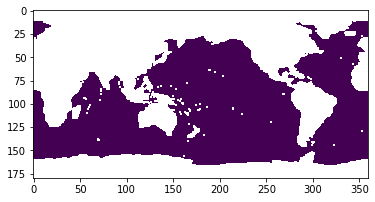

In [6]:
plt.imshow(np.flipud(data.mask))

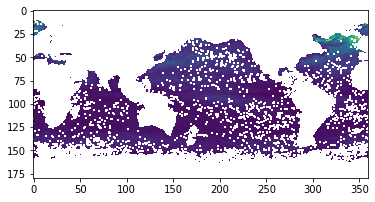

In [15]:
plt.imshow(np.flipud(data.mld[0]))

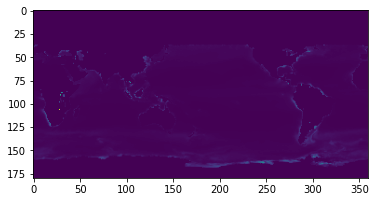

In [16]:
plt.imshow(np.flipud(data.chl[0]))

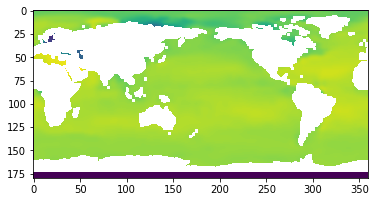

In [17]:
plt.imshow(np.flipud(data.sss[0]))

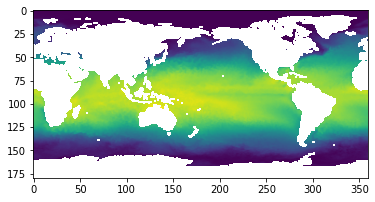

In [18]:
plt.imshow(np.flipud(data.sst[0]))

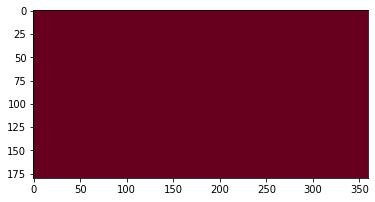

In [23]:
plt.imshow(np.flipud(data.atm_pco2_uatm[413]),cmap="RdBu")

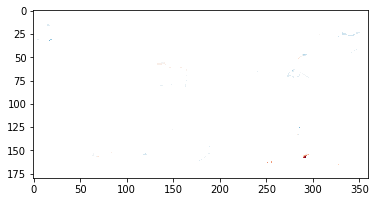

In [32]:
plt.imshow(np.flipud(data.fco2_ave_unwtd[421]),cmap="RdBu")

In [57]:
data.fco2_ave_unwtd.data.shape #31,104,000

(480, 180, 360)

In [16]:
np.sum(~np.isnan(data.fco2_ave_unwtd))

<xarray.DataArray 'fco2_ave_unwtd' ()>
array(344325)

In [15]:
np.sum(~np.isnan(data.fco2_ave_unwtd[192:]))

<xarray.DataArray 'fco2_ave_unwtd' ()>
array(301445)

In [59]:
# percent coverage image,
344325/(480*180*360) *100 

1.1070119598765433

In [64]:

# percent coverage ocean

344325/480*np.sum(~np.isnan(data.mask))*100

<xarray.DataArray 'mask' ()>
array(2.43817967e+09)

In [46]:
fco2 = data.fco2_ave_unwtd.data

In [49]:
nonnan= ~np.isnan(data.fco2_ave_unwtd.data)
nonnans_fco2 = fco2[nonnan]

In [51]:
np.mean(nonnans_fco2),np.std(nonnans_fco2), np.median(nonnans_fco2)

(360.78934, 48.072693, 361.17413)

In [55]:
np.min(nonnans_fco2),np.max(nonnans_fco2) # max what?

(44.496582, 4118.472)

(array([2.15000e+02, 2.12800e+03, 1.36240e+04, 1.93008e+05, 1.27672e+05,
        6.68500e+03, 6.63000e+02, 1.82000e+02, 8.70000e+01, 2.00000e+01,
        1.30000e+01, 6.00000e+00, 0.00000e+00, 1.00000e+00, 4.00000e+00,
        0.00000e+00, 2.00000e+00, 1.00000e+00, 1.00000e+00, 3.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([  44.496582,  125.9761  ,  207.45561 ,  288.93512 ,  370.41464 ,
         451.89413 ,  533.37366 ,  614.85315 ,  696.3327  ,  777.8122  ,
         859.2917  ,  940.77124 , 1022.25073 , 1103.7302  , 1185.2097  ,
        1266.6892  , 1348.1688  , 1429.6483  , 15

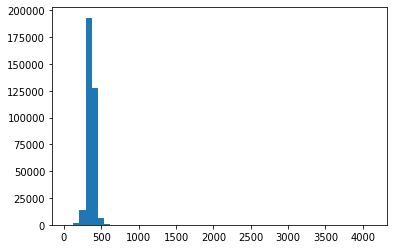

In [54]:
#distribution of fco2
plt.hist(nonnans_fco2,bins = 50)